# Forecasting in Hindsight: Assessing if Baltimore's 8 Day Forecasted Temperatures are in Line with Historical Norms

### Fall has arrived, and with it, cooler temperatures are to be expected. But, knowing temperatures can fluctuate from day to day, are the forecasted temperatures typical for this time of year?

This notebook seeks to answer this question. To resolve it, we will be taking the eight day forecast from [OpenWeather API](https://openweathermap.org/api) and comparing it to historical data for the same dates between 1950 and 2018. The API data was pulled on October 3, 2020 for dates including October 3, 2020 to October 10, 2020. The historical weather data was taken from Carnegie Mellon University's compiled United States Weather Station data taken from the weather station at Baltimore-Washington Thurgood Marshall International Airport (BWI). These datasets can be found [here](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488?file=20881932). The datasets were cleaned and merged into a single csv file, which will be used here.

We will use this information to review whether the forecast is typical and within norms for this time historically.

If you wish to review how this data was retrieved and cleaned, including how to utilize the API, please refer to {NOTEBOOK LINK}.

### Terminology

For reference, here are some terms from the table:

- <b>Date</b>: This is the date for the given temperature readings or forecast.<br>
    - <b>Decade</b>: This is the decade that the corresponding date belongs to.<br>
    - <b>Year</b>: This is the year of the corresponding date.<br>
    - <b>Month</b>: This is the month of the corresponding date.<br>
    - <b>Day</b>: This is the day of the corresponding date.<br>
- <b>min</b>: This is the minimum or low temperature of the corresponding date.<br>
- <b>max</b>: This is the maximum or high temperature of the corresponding date.<br>
- <b>mean</b>: This is the mean or average temperature of the corresponding date.<br>

### Summary

The forecasted temperatures for Baltimore, MD, USA for the week dating from October 3, 2020 to October 10, 2020 are common for the time period historically. The average forecasted high temperature is approximately 1.5 degrees Fahrenheit below the average high from 1950 to 2018. However, the average forecasted low temperature is more than 6 degrees Fahrenheit above the the average low from 1950 to 2018. What is most notable is that the temperature is rather stable, as the difference between the forecasted high and low temperatures is only 63.68% of the average historic difference between high and low temperatures. This means that we can expect less temperature change during the upcoming week than is typical. No heavy coats needed yet. 

### Limitations
One of the main limitations of this project regards the dataset. It is only 568 rows. This is due mainly to the small window of time we are exploring (an eight day period). Additionally, while the original dataset from Carnegie Mellon University contains data beginning in 1871, we decided to remove all data from before 1950. The reasoning behind this is that the original US Weather Station for Baltimore was located in downtown Baltimore until 1950, when it was moved to its current location at the airport that is now known as BWI. For consistency of data, the decision to shrink the dataset was made. Further exploration to compare the forecast to dates beginning in the 1870s could be done, however.

### I. Importing Needed Tools and Dataset

For this project, we will need pandas, numpy, matplotlib, and seaborn. We will also pull our dataset from the Data folder.

In [2]:
# import tools / libraries / csv

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

df = pd.read_csv(r'~/Github/DATA601_Project2/Data/CombinedWeather.csv')

### II. Create Necessary Objects

We will also need to create objects that include subsets of data, as well as lists of historic maximum, minimum, and mean temperatures. These objects will be used in graphing.

In [4]:
# Create objects
historic = df[df['Year'] < 2020]
forecast = df[df['Year'] == 2020]

# Historic max temperatures
max_Oct3 = historic[historic['Day'] == 3]['max'].max()
max_Oct4 = historic[historic['Day'] == 4]['max'].max()
max_Oct5 = historic[historic['Day'] == 5]['max'].max()
max_Oct6 = historic[historic['Day'] == 6]['max'].max()
max_Oct7 = historic[historic['Day'] == 7]['max'].max()
max_Oct8 = historic[historic['Day'] == 8]['max'].max()
max_Oct9 = historic[historic['Day'] == 9]['max'].max()
max_Oct10 = historic[historic['Day'] == 10]['max'].max()
max_temps = [max_Oct3, max_Oct4, max_Oct5, max_Oct6, max_Oct7, max_Oct8, max_Oct9, max_Oct10]


# Historic min temperatures
min_Oct3 = historic[historic['Day'] == 3]['min'].min()
min_Oct4 = historic[historic['Day'] == 4]['min'].min()
min_Oct5 = historic[historic['Day'] == 5]['min'].min()
min_Oct6 = historic[historic['Day'] == 6]['min'].min()
min_Oct7 = historic[historic['Day'] == 7]['min'].min()
min_Oct8 = historic[historic['Day'] == 8]['min'].min()
min_Oct9 = historic[historic['Day'] == 9]['min'].min()
min_Oct10 = historic[historic['Day'] == 10]['min'].min()
min_temps = [min_Oct3, min_Oct4, min_Oct5, min_Oct6, min_Oct7, min_Oct8, min_Oct9, min_Oct10]


# Historic mean temperatures
mean_Oct3 = historic[historic['Day'] == 3]['mean'].mean()
mean_Oct4 = historic[historic['Day'] == 4]['mean'].mean()
mean_Oct5 = historic[historic['Day'] == 5]['mean'].mean()
mean_Oct6 = historic[historic['Day'] == 6]['mean'].mean()
mean_Oct7 = historic[historic['Day'] == 7]['mean'].mean()
mean_Oct8 = historic[historic['Day'] == 8]['mean'].mean()
mean_Oct9 = historic[historic['Day'] == 9]['mean'].mean()
mean_Oct10 = historic[historic['Day'] == 10]['mean'].mean()
mean_temps = [mean_Oct3, mean_Oct4, mean_Oct5, mean_Oct6, mean_Oct7, mean_Oct8, mean_Oct9, mean_Oct10]

# Historic average high temperatures
avghigh_Oct3 = historic[historic['Day'] == 3]['max'].mean()
avghigh_Oct4 = historic[historic['Day'] == 4]['max'].mean()
avghigh_Oct5 = historic[historic['Day'] == 5]['max'].mean()
avghigh_Oct6 = historic[historic['Day'] == 6]['max'].mean()
avghigh_Oct7 = historic[historic['Day'] == 7]['max'].mean()
avghigh_Oct8 = historic[historic['Day'] == 8]['max'].mean()
avghigh_Oct9 = historic[historic['Day'] == 9]['max'].mean()
avghigh_Oct10 = historic[historic['Day'] == 10]['max'].mean()
avghigh_temps = [avghigh_Oct3, avghigh_Oct4, avghigh_Oct5, avghigh_Oct6, avghigh_Oct7, avghigh_Oct8, avghigh_Oct9, avghigh_Oct10]

# Historic average low temperatures
avglow_Oct3 = historic[historic['Day'] == 3]['min'].mean()
avglow_Oct4 = historic[historic['Day'] == 4]['min'].mean()
avglow_Oct5 = historic[historic['Day'] == 5]['min'].mean()
avglow_Oct6 = historic[historic['Day'] == 6]['min'].mean()
avglow_Oct7 = historic[historic['Day'] == 7]['min'].mean()
avglow_Oct8 = historic[historic['Day'] == 8]['min'].mean()
avglow_Oct9 = historic[historic['Day'] == 9]['min'].mean()
avglow_Oct10 = historic[historic['Day'] == 10]['min'].mean()
avglow_temps = [avglow_Oct3, avglow_Oct4, avglow_Oct5, avglow_Oct6, avglow_Oct7, avglow_Oct8, avglow_Oct9, avglow_Oct10]

days = ['Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7', 'Oct 8', 'Oct 9', 'Oct 10']

### III. Check for Outliers

To determine if mean or median is preferrable, we need to verify that there are no to few outliers. If there are multiple outliers, we will need to use median.

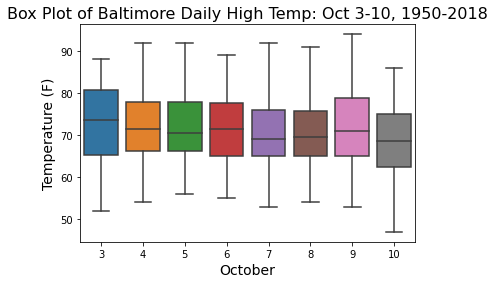

In [5]:
# Box plot of high temperatures
aplot = sns.boxplot(x = historic['Day'], y = historic['max'], data = historic)
aplot.axes.set_title('Box Plot of Baltimore Daily High Temp: Oct 3-10, 1950-2018', fontsize=16)
aplot.set_xlabel('October', fontsize=14)
aplot.set_ylabel('Temperature (F)', fontsize=14)
aplot.figure.savefig('BoxPlotHigh.png', bbox_inches = 'tight')

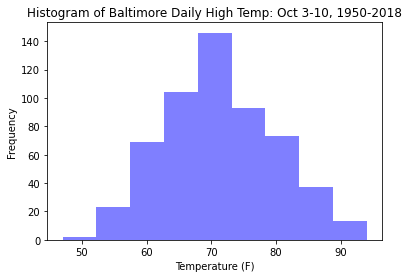

In [75]:
# Histogram of high temperatures
x = historic['max']
num_bins = 9
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)

# Histogram settings
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Histogram of Baltimore Daily High Temp: Oct 3-10, 1950-2018')
plt.savefig('HighTempHistogram.png', bbox_inches = 'tight')
plt.show()


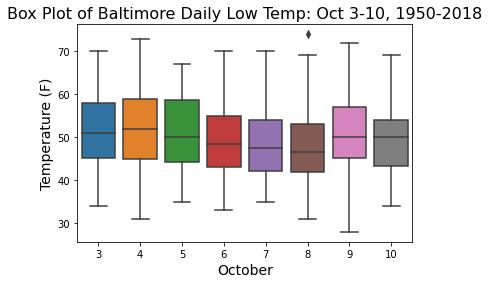

In [8]:
# Box plot of low temperatures
bplot = sns.boxplot(x = historic['Day'], y = historic['min'], data = historic)
bplot.axes.set_title('Box Plot of Baltimore Daily Low Temp: Oct 3-10, 1950-2018', fontsize=16)
bplot.set_xlabel('October', fontsize=14)
bplot.set_ylabel('Temperature (F)', fontsize=14)
bplot.figure.savefig('BoxPlotLow.png', bbox_inches = 'tight')

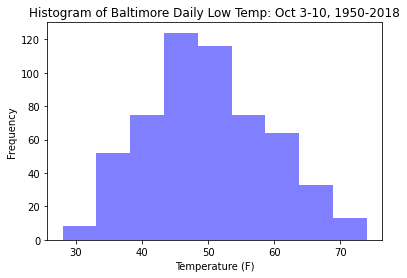

In [77]:
# Histogram of low temperatures
x = historic['min']
num_bins = 9
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)

# Histogram settings
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Histogram of Baltimore Daily Low Temp: Oct 3-10, 1950-2018')
plt.savefig('LowTempHistogram.png', bbox_inches = 'tight')
plt.show()

Given that there is only a single outlier in the box plots above, the relative stability of temperatures, and that the temperatures are distributed fairly normally, we can use mean.

### IV. Comparing Forecast to Past Data
Now that we have seen the distribution of the historical data, we should compare the forecast to it. In the first chart, we will compare the forecasted temperature to extremes and the mean. The shaded region is the temperature range of the forecast.

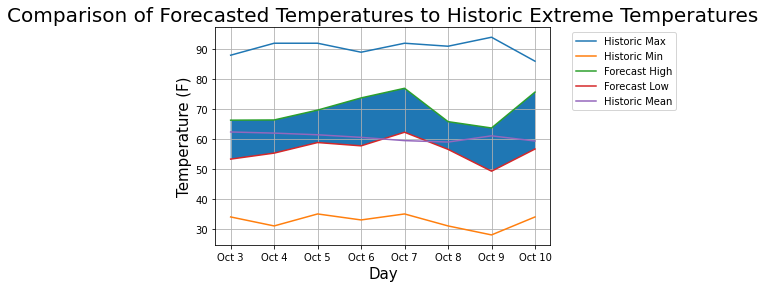

Forecasted temperature range is shaded area


In [82]:
# Line 1 - Historical max
x1 = days
y1 = max_temps
plt.plot(x1, y1, label = "Historic Max")
# Line 2 - Historical min
x2 = days
y2 = min_temps
plt.plot(x2, y2, label = "Historic Min")
# Line 3 - Forecast max
x3 = days
y3 = forecast['max']
plt.plot(x3, y3, label = "Forecast High")
# Line 4 - Forecast min
x4 = days
y4 = forecast['min']
plt.plot(x4, y4, label = "Forecast Low")
# Line 5 - Historical mean
x5 = days
y5 = mean_temps
plt.plot(x5, y5, label = "Historic Mean")

# Graph settings
plt.grid(True)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Temperature (F)', fontsize=15)
plt.title('Comparison of Forecasted Temperatures to Historic Extreme Temperatures',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.fill_between(days, y3, y4)
plt.savefig('ForecastComparison1.png', bbox_inches = 'tight')
plt.show()
print('Forecasted temperature range is shaded area')

We see that the forecasted weather is well within the extremes and only strays from the mean temperature slightly on October 7. So the forecast is not one of extremes.

Let's compare the forecasted high and low temperatures to the historic averages. 

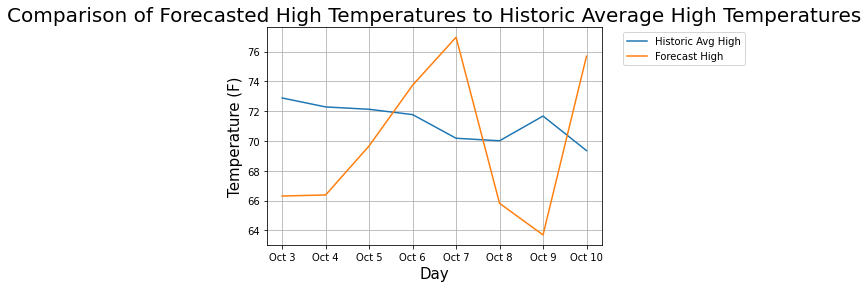

In [19]:
# Compare average highs over this range

# Line 1 - Average Historical High Temp
x1 = days
y1 = avghigh_temps
plt.plot(x1, y1, label = "Historic Avg High")

# Line 2 - Forecasted High Temp
x2 = days
y2 = forecast['max']
plt.plot(x2, y2, label = "Forecast High")

# Graph settings
plt.grid(True)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Temperature (F)', fontsize=15)
plt.title('Comparison of Forecasted High Temperatures to Historic Average High Temperatures',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('ForecastComparison2.png', bbox_inches = 'tight')
plt.show()


In [24]:
# Calculate average distance between historical average high temp and forecasted high temp
avghigh_diff = forecast['max'].mean() - historic['max'].mean()
limavghigh_diff = round(avghigh_diff, 3)
print('Average temperature difference between forecasted high temperatures and historical average high temperatures:', limavghigh_diff, 'degrees Fahrenheit')

Average temperature difference between forecasted high temperatures and historical average high temperatures: -1.503 degrees Fahrenheit


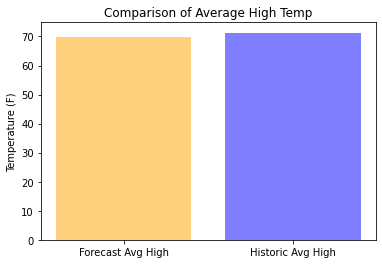

In [9]:
# Graph the difference between temperatures

# Create variables
objects = ('Forecast Avg High','Historic Avg High')
y_pos = np.arange(len(objects))
TempsH = [forecast['max'].mean(), historic['max'].mean()]

# Create graph
plt.bar(y_pos, TempsH, align='center', color = ['orange', 'blue'], alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Temperature (F)')
plt.title('Comparison of Average High Temp')
plt.savefig('HighTempBar.png', bbox_inches = 'tight')
plt.show()

We see that there is very little difference in the average high temperatures between the forecast and historic values. In fact, the difference is only -1.503 degrees Fahrenheit, meaning the forecast is just slightly lower than the average. Let's take a look at the low temperatures.

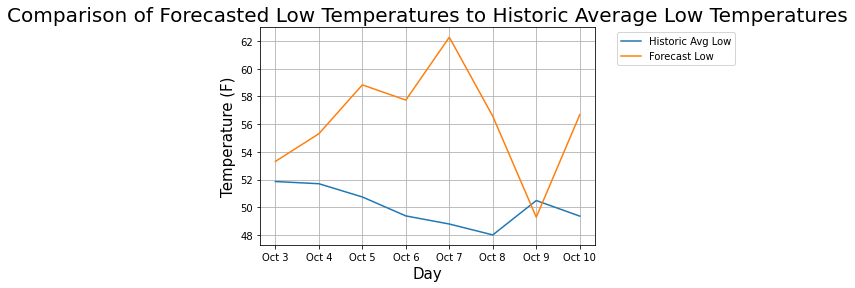

In [20]:
# Compare average lows over this range

# Line 1 - Average Historical High Temp
x1 = days
y1 = avglow_temps
plt.plot(x1, y1, label = "Historic Avg Low")

# Line 2 - Forecasted High Temp
x2 = days
y2 = forecast['min']
plt.plot(x2, y2, label = "Forecast Low")

# Graph settings
plt.grid(True)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Temperature (F)', fontsize=15)
plt.title('Comparison of Forecasted Low Temperatures to Historic Average Low Temperatures',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('ForecastComparison3.png', bbox_inches = 'tight')
plt.show()


In [23]:
# Calculate average distance between forecasted low temp and historic average low temp
avglow_diff = forecast['min'].mean() - historic['min'].mean()
limavglow_diff = round(avglow_diff, 3)
print('Avg difference between forecasted high and historical avg high temperatures:', limavglow_diff, 'degrees Fahrenheit')

Avg difference between forecasted high and historical avg high temperatures: 6.214 degrees Fahrenheit


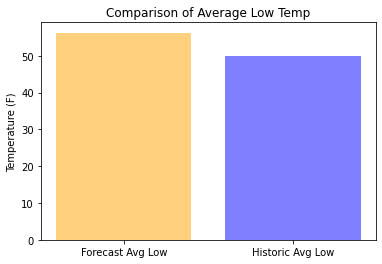

In [10]:
# Graph the difference between temperatures

# Create variables
objects1 = ('Forecast Avg Low','Historic Avg Low')
y_pos1 = np.arange(len(objects1))
TempsL = [forecast['min'].mean(), historic['min'].mean()]

# Create graph
plt.bar(y_pos1, TempsL, align='center', color = ['orange', 'blue'], alpha=0.5)
plt.xticks(y_pos1, objects1)
plt.ylabel('Temperature (F)')
plt.title('Comparison of Average Low Temp')
plt.savefig('LowTempBar.png', bbox_inches = 'tight')
plt.show()

There is a greater difference between the average low temperatures of the forecasted and historic values. The forecast calls for low temperatures that are, on average, 6.214 degrees Fahrenheit above the historic mean. We can therefore expect nighttime temperatures to be slightly warmer than usual.

Let's explore these futher to get a better view of how the forecasted temperature compares to the historic averages.

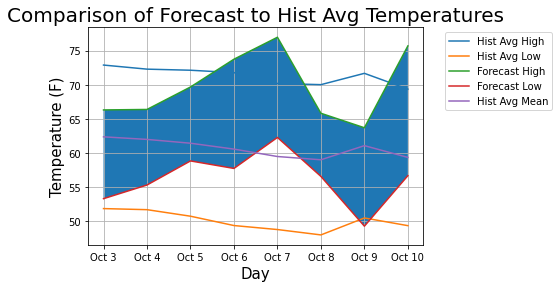

Forecasted temperature range is shaded area


In [91]:
# Line 1 - Historical avg high
x1 = days
y1 = avghigh_temps
plt.plot(x1, y1, label = "Hist Avg High")
# Line 2 - Historical min
x2 = days
y2 = avglow_temps
plt.plot(x2, y2, label = "Hist Avg Low")
# Line 3 - Forecast max
x3 = days
y3 = forecast['max']
plt.plot(x3, y3, label = "Forecast High")
# Line 4 - Forecast min
x4 = days
y4 = forecast['min']
plt.plot(x4, y4, label = "Forecast Low")
# Line 5 - Historical mean
x5 = days
y5 = mean_temps
plt.plot(x5, y5, label = "Hist Avg Mean")

# Graph settings
plt.grid(True)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Temperature (F)', fontsize=15)
plt.title('Comparison of Forecast to Hist Avg Temperatures',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.fill_between(days, y3, y4)
plt.savefig('ForecastComparison4.png', bbox_inches = 'tight')
plt.show()
print('Forecasted temperature range is shaded area')

What we see is that the forecast calls for temperatures that are mostly within the historic averages. What stands out is that the difference between the forecast's daily high and low temperatures is smaller than the gap between the historic average high and low temperatures. This would suggest that the temperature is more stable than usual, with less temperature change over the course of the given days than is to be expected. Let's calculate this.

In [11]:
# use Numpy to calculate average difference between high and low temps
forecast_diff = np.average(np.average([forecast['max'] - forecast['min']]))
forecast_diff = round(forecast_diff, 3)
historic_diff = np.average(np.average([historic['max'] - historic['min']]))
historic_diff = round(historic_diff, 3)

# Print
print('The difference between the forecasted daily high and low temperatures is:', forecast_diff, 'degrees Fahrenheit')
print('The difference between the historic avg daily high and low temperatures is:', historic_diff, 'degrees Fahrenheit')
print('The forecast daily temperature range is smaller than the historic average by', historic_diff - forecast_diff, 'degrees Fahrenheit, or', round(100-(forecast_diff/historic_diff)*100, 3), '%')

The difference between the forecasted daily high and low temperatures is: 13.532 degrees Fahrenheit
The difference between the historic avg daily high and low temperatures is: 21.25 degrees Fahrenheit
The forecast daily temperature range is smaller than the historic average by 7.718 degrees Fahrenheit, or 36.32 %


## Conclusion

In conclusion, we find that while the forecasted daily high and low temperatures are fairly common for this time of year in Baltimore, the forecasted temperature is uncommonly stable. The forecasted high temperatures are only 1.5 degrees Fahrenheit below the average, but the forecasted low temperatures are 6 degrees higher than normal. This creates a narrower range of temperatures each day.

As a result, we can expect that the daily low temperature will be comparatively close to the daily high temperature. For practical purposes, this also means that you can be fairly consistent with your clothing throughout the day and into the night, which isn't so common in fall.